This notebook will demostrate how to match catalogs with this package.

In [1]:
import warnings
warnings.filterwarnings('ignore')

## Data I/O
<!-- To initialize an `astrotable.table.Data` object, input path to the data, an `astropy.table.Table` object, or anything that can be converted to an `astropy.table.Table` object.  -->
In this package, data are handled by the `astrotable.table.Data` class. Intuitively (though not accurately), a 'class' is a type of objects that can store information and perform certain operations. As we will see later, we can initialize an `astrotable.table.Data` object, which can store a data table (in the memory) and allows you to do operations including matching, merging and more.

To get started, import the `astrotable.table.Data` class:

In [2]:
from astrotable.table import Data

### Reading and writing `Table`-like data

The data table of an `astrotable.table.Data` object is stored in an `astropy.table.Table` object, so you can load anything that can be converted to an `astropy.table.Table`. For introduction to tables and documentations on the `astropy.table.Table`, see [Astropy's documentation on Data Tables](https://docs.astropy.org/en/stable/table/index.html), especially the supported formats of Astropy's [Built-In Table Readers/Writers](https://docs.astropy.org/en/stable/io/unified.html#built-in-readers-writers).

The most straightforward way to load a table is to initialize a `Data` object with the path to the data file (note that the files in `./samples/` directory are randomly generated datasets):

In [3]:
cat1 = Data('samples/catalog1.csv', name='cat1') # cat1 is an astropy.table.Table object

It is highly recommended to input a `name` keyword argument, as this name will be used to distinguish different datasets. If `Data` is initialized with a path to file and no `name` is given, it will be automatically set to the file name.

The `astropy.table.Table` object used to store the table can be accessed with `data.t`. Thus, you can do anything as you can do with an `astropy.table.Table` object. 

In [4]:
print("Name:", cat1.name)
cat1.t # an astropy.table.Table

Name: cat1


survey1_id,RA,Dec,A,B
int32,float64,float64,int32,int32
0,134.8344427850505,-87.17137328819392,1648,312
1,342.2571503075698,-32.72306298625976,5539,35
2,263.51781905210584,-61.7079617031306,9637,172
3,215.5170543109332,-44.22863779517675,4199,19
4,56.16671055927715,-8.319017346651634,8445,320
5,56.158027321032954,-67.56369937660125,2557,263
6,20.910100380551807,-53.06553692679332,5592,493
7,311.82341247897665,-22.000397531125614,98,399
8,216.40140422755516,-69.40816510575398,2200,141


You may also add keyword arguments to be passed to `astropy.table.Table.read()`:

In [5]:
cat3id = Data('samples/catalog3_id.txt', name='cat3id',
              names=['cat3ID', 'survey2_id'], format='ascii') # 'ascii' is one of the supported formats of Astropy's Built-In Table Readers/Writers.
cat3v = Data('samples/catalog3_measurement.txt', name='cat3v',
             names=['survey2_id', 'x', 'y', 'class1'], format='ascii')

A `Data` object can also be created with an `astropy.table.Table` object, or anything that can be converted to an `astropy.table.Table` object. 

In [6]:
from astropy.table import Table
cat2_table = Table.read('samples/catalog2.fits')
cat2 = Data(cat2_table, name='cat2')
cat4_dict = dict(Table.read('samples/catalog4.hdf5'))
# print(cat4_dict)
cat4 = Data(cat4_dict, name='cat4')

You can save the table to files with Astropy's table writers (see Astropy's documentation on [Reading and Writing Table Objects](https://docs.astropy.org/en/stable/table/io.html)):

In [7]:
# cat1.t.write(filename, format=supported_format)

### Reading and writing an `astrotable.table.Data` object
Though you can write the table with the `astropy`'s writers (as shown above), it is more recommended to use the `save()` method of the `astrotable.table.Data` object itself (note that it is different from `cat1.t.write()`). This method not only saves the data table, but also saves other key properties of the data (e.g. the user-defined row subsets) of an `astrotable.table.Data` object. 

In [8]:
cat1.save('samples/output/cat1', overwrite=True) # set overwrite=True to overwrite an existing file

The data is saved to `'samples/output/cat1.data'`.

Note that the data's matching with other data is not saved. If you want to match the data (say `cat1`) with other datasets (say `cat4`), you have to merge the datasets into one dataset (say `merged_cat`), and save the merged dataset (`merged_cat`). If you save `cat1` to a ".data" file and load it later, you are unable to recover the match between `cat1` and `cat4`.

To load a ".data" file and (mostly) recover `cat1`, the `astrotable.table.Data` object:

In [9]:
cat1 = Data.load('samples/output/cat1.data')

## Matching
In this package, catalog B is said to be *matched to* A, if each record (row) in A is assigned two values:
- Whether it can be matched to a record in catalog B;
- The index of the best match record in catalog B (if no match possible, the index can be any number but means nothing).

A is referred to as the *base data* of the match.

### Matching with a built-in matcher
To match `cat4` to `cat1` with the exact value of the `'survey1_id'` field in `cat1` and the `'survey1_id'` field in `cat4`, use an `ExactMatcher`:

In [10]:
from astrotable.matcher import ExactMatcher
cat1.match(cat4, ExactMatcher('survey1_id', 'survey1_id'))

"cat4" matched to "cat1": 56/100 matched.


Since there are more than one records for the same `'survey1_id'` in `cat4`, matching `cat1` to `cat4` is not equal to matching `cat4` to `cat1`:

In [11]:
cat4.match(cat1, ExactMatcher('survey1_id', 'survey1_id'))

"cat1" matched to "cat4": 70/70 matched.


You may use any iterable object (e.g. an array) to match the catalogs, provided that what is used to match catalogs has the same length (i.e. number of records) as the catalogs.

In [12]:
print('len(cat3v) =', len(cat3v))
print('len(cat3id) =', len(cat3id))
cat2.match(cat3v, ExactMatcher('survey2_id', cat3id.t['survey2_id']))

len(cat3v) = 110
len(cat3id) = 110
"cat3v" matched to "cat2": 110/150 matched.


You can also match data with thier coordinates:

In [13]:
from astrotable.matcher import SkyMatcher
import astropy.units as u
cat1.match(cat2, SkyMatcher(unit=u.deg, unit1=(u.h, u.deg))) # RA for cat1 is dms; RA for cat2 is hms.

Data cat1: found RA name 'RA' and Dec name 'Dec'.
Data cat2: found RA name 'RA' and Dec name 'Dec'.
"cat2" matched to "cat1": 90/100 matched.


For more information on `SkyMatcher`, use `help(SkyMatcher)`.

To remove all matches to `cat1`, use:

In [14]:
# cat1.reset_match()

To unmatch `cat2` from `cat1`:

In [15]:
cat1.unmatch(cat2)

"cat2" unmatched to "cat1".


For `SkyMatcher`, you can also explore the distribution of minimum sky distances, i.e. the distance to the nearest object in `cat2` for each object in `cat1`:

Data cat1: found RA name 'RA' and Dec name 'Dec'.
Data cat2: found RA name 'RA' and Dec name 'Dec'.
"cat2" matched to "cat1": 90/100 matched.


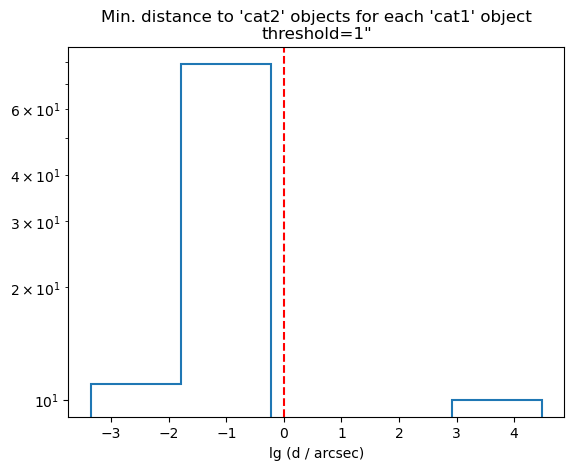

In [16]:
skymatcher = SkyMatcher(unit=u.deg, unit1=(u.h, u.deg))
skymatcher.explore(cat1, cat2)
cat1.match(cat2, skymatcher)

### Defining custom matchers
**Note**: This part is for advanced users. If you are new to this package, you may skip this part for now.

You may also define your own matchers. A macther class should be defined like this:

In [17]:
class MyMatcher():
    def __init__(self, args): # 'args' means any number of arguments that you need
        # initialize it with args you need
        pass
    
    def get_values(self, data, data1, verbose=True): # data1 is matched to data
        # prepare the data that is needed to do the matching (if necessary)
        pass
    
    def match(self):
        # do the matching process and calculate:
        # idx : array of shape (len(data), ). 
        #     the index of a record in data1 that best matches the records in data
        # matched : boolean array of shape (len(data), ).
        #     whether the records in data can be matched to those in data1.
        return idx, matched

## Merging catalogs

### Match tree
If B is matched to A, I call A as the *child data* of B, and B as the *parent data* of A.

Say B, C are matched to A, and D is matched to B. Then B, C are children of A, and D is child of B. When we try to merge everything into A<!-- (i.e. add the information of corresponding records in B, C, D into A)--> (i.e. merge the information in A's chilren, grandchildren, etc. into A), it may be useful to see all of its children/grandchildren, or what I call the *match tree*:

In [18]:
cat1.match_tree(detail=False)

Names with parentheses are already matched, thus they are not expanded and will be ignored when merging.
---------------
cat1
:   cat4
:   :   (cat1)
:   cat2
:   :   cat3v
---------------


From the *match tree* we may see that `cat4` and `cat2` are matched to `cat1` and `cat3v` is matched to `cat2`. Although `cat1` is also matched to `cat4`, this match is a duplication in this match tree, and will be ignored when merging everything (`cat4`, `cat2` and `cat3v`) into `cat1`.

For more information on how they are matched:

In [19]:
cat1.match_tree(detail=True)

Names with parentheses are already matched, thus they are not expanded and will be ignored when merging.
---------------
cat1 [base]
:   cat4 [ExactMatcher('survey1_id', 'survey1_id')]
:   :   (cat1) [ExactMatcher('survey1_id', 'survey1_id')]
:   cat2 [SkyMatcher with thres=1]
:   :   cat3v [ExactMatcher('survey2_id', 'survey2_id')]
---------------


For example, we may also use `cat4` as the base catalog:

In [20]:
cat4.match_tree(detail=False)

Names with parentheses are already matched, thus they are not expanded and will be ignored when merging.
---------------
cat4
:   cat1
:   :   (cat4)
:   :   cat2
:   :   :   cat3v
---------------


### Catalog merging
Now we can merge everything possible to be merged into `cat1`:

In [21]:
merged_cat = cat1.merge(outname='my_merged_catalog')
print("Name:", merged_cat.name)
merged_cat.t

merged: cat1, cat4, cat2, cat3v
Name: my_merged_catalog


survey1_id_cat1,RA_cat1,Dec_cat1,A,B,id,survey1_id_cat4,i,j,survey2_id_cat2,RA_cat2,Dec_cat2,a,b,survey2_id_cat3v,x,y,class1
int32,float64,float64,int32,int32,int32,int32,int32,int32,int32,float64,float64,int32,int32,int32,int32,int32,str8
0,134.8344427850505,-87.17137328819392,1648,312,61,0,4612,3147,94,8.98895958611857,-87.17137328819392,3191,50,94,671,583,Type II
1,342.2571503075698,-32.72306298625976,5539,35,24,1,6262,5704,90,22.817134875833332,-32.72306298625976,5383,38,90,288,458,Type II
2,263.51781905210584,-61.7079617031306,9637,172,8,2,3568,6944,103,17.56785302820989,-61.7079617031306,943,16,103,523,685,Type II
7,311.82341247897665,-22.000397531125614,98,399,16,7,1274,5188,101,20.78823016812825,-22.000397531125614,5005,48,101,223,116,Type III
9,254.90612800657638,-83.07180811540863,2961,459,52,9,891,5450,113,16.993742542070294,-83.07180811540863,1308,7,113,515,659,Type II
11,349.16754677831796,-75.4900841471396,4433,470,7,11,6116,6083,53,23.277828530405216,-75.4900841471396,3495,28,53,674,272,Type III
16,109.52720746543358,-17.669513079079692,6944,287,36,16,1239,1347,83,7.3018168152337175,-17.669513079079692,2490,16,83,569,462,Type III
19,104.8424904712951,-41.459198227591436,4911,341,63,19,1198,4806,104,6.989499173053064,-41.459198227591436,4425,73,104,556,785,Type III
20,220.2670421000566,-17.33038603523437,3987,50,11,20,2203,5406,78,14.68447580405005,-17.33038603523437,3079,25,78,473,165,Type I


Note that columns with the same names are renamed by the `name` of the `Data` objects. You may also check that the match is indeed correct.

We may now save the merged catalog for later use:

In [22]:
merged_cat.save('samples/output/merged_cat', overwrite=True) # you don't need overwrite=True if file 'samples/output/merged_cat.data' does not exist
# load with:
# merged_cat = Data.load('samples/output/merged_cat.data')

### Source of a column
Sometimes we forget the name of the data from which a column is merged. For example, we are sure that the column named `'A'` is merged from somewhere, but cannot recall the name of that dataset. We can use the `from_which()` method:

In [23]:
merged_cat.from_which('A')

'cat1 ("samples/catalog1.csv")'

The column `'A'` indeed comes from `cat1`, which is loaded from `"samples/catalog1.csv"`.

**WARNING**. The `from_which()` method has several limitations:
- In some cases, the software cannot decide the source of the column, and `from_which()` will return an empty string.
- Direct operations on the data table (`astropy.table.Table`), especially adding columns to the data table using the values of other columns, can result in incorrect results of `from_which()`. For example, instead of:

In [24]:
# WRONG:
merged_cat.t['A+i (wrong)'] = merged_cat.t['A'] + merged_cat.t['i'] # adding a new column
merged_cat.from_which('A+i (wrong)') # wrong result

'cat1 ("samples/catalog1.csv")'

use:

In [25]:
# CORRECT:
merged_cat['A+i (right)'] = merged_cat['A'] + merged_cat['i'] # adding a new column
merged_cat.from_which('A+i (right)') # right result: this column is added by the user

'user-added ()'

### Merging options

Maybe you want to keep records that cannot be matched to `cat3v` and only want to merge subsets of columns from the catalogs:

In [26]:
merge_columns = { # specify columns to be merged
    'cat1': ['survey1_id', 'RA', 'Dec'],
    'cat4': ['i', 'j'],
    'cat2': ['survey2_id'],
    'cat3v': ['class1'],
    }

keep_unmatched = ['cat3v'] # keep records that cannot be matched to cat3v

another_merged_cat = cat1.merge(keep_unmatched=keep_unmatched, 
                                merge_columns=merge_columns) # use default outname
print("Name:", another_merged_cat.name)
another_merged_cat.t

entries with no match for cat3v is kept.
merged: cat1, cat4, cat2, cat3v
Name: match_cat1_cat4_cat2_cat3v


survey1_id,RA,Dec,i,j,survey2_id,class1
int32,float64,float64,int32,int32,int32,str8
0,134.8344427850505,-87.17137328819392,4612,3147,94,Type II
1,342.2571503075698,-32.72306298625976,6262,5704,90,Type II
2,263.51781905210584,-61.7079617031306,3568,6944,103,Type II
4,56.16671055927715,-8.319017346651634,5342,1667,122,--
5,56.158027321032954,-67.56369937660125,3192,986,92,--
7,311.82341247897665,-22.000397531125614,1274,5188,101,Type III
9,254.90612800657638,-83.07180811540863,891,5450,113,Type II
10,7.410417946488881,-63.922369237760876,1969,1388,14,--
11,349.16754677831796,-75.4900841471396,6116,6083,53,Type III


You can also specify the columns to be ignored during merging (the `ignore_columns` argument of `merge()`); see `help(Data.merge)` for details.

You may also set the depth for `match_tree` and `merge` methods. Setting depth to 0 means only keeping the base catalog itself.

In [27]:
cat4.match_tree(depth=2)

Names with parentheses are already matched, thus they are not expanded and will be ignored when merging.
---------------
cat4 [base]
:   cat1 [ExactMatcher('survey1_id', 'survey1_id')]
:   :   (cat4) [ExactMatcher('survey1_id', 'survey1_id')]
:   :   cat2 [SkyMatcher with thres=1]
---------------


In [28]:
cat4.match_tree(depth=0)

Names with parentheses are already matched, thus they are not expanded and will be ignored when merging.
---------------
cat4 [base]
---------------


In [29]:
cat4.merge(depth=1).t

merged: cat4, cat1


id,survey1_id_cat4,i,j,survey1_id_cat1,RA,Dec,A,B
int32,int32,int32,int32,int32,float64,float64,int32,int32
0,78,7029,6887,78,129.04766227593814,-5.694301013693888,7455,126
1,33,6099,3952,33,341.59879341119995,-59.614634573673484,3436,325
2,35,9499,4683,35,291.023045321926,-60.911736118132026,5895,53
3,5,3192,986,5,56.158027321032954,-67.56369937660125,2557,263
4,38,3178,1863,38,246.32388954437647,-57.273335785863544,4893,100
5,41,6052,4440,41,178.26368764005727,-67.33959337571723,5600,52
6,57,2734,4909,57,70.55383047089227,-21.45423462041542,606,307
7,11,6116,6083,11,349.16754677831796,-75.4900841471396,4433,470
8,2,3568,6944,2,263.51781905210584,-61.7079617031306,9637,172


## Things to be noted

This package does not support matching multiple records to a single record in the base data. For example, `table2` below has two records with the same `survey_id`:

In [30]:
table1 = Data({'survey_id': [0, 1, 2], 'value': ['A', 'B', 'C']}, name='t1')
table1.t

survey_id,value
int32,str1
0,A
1,B
2,C


In [31]:
table2 = Data({'table2_id': [0, 1, 2], 'survey_id': [0, 1, 0]}, name='t2')
table2.t

table2_id,survey_id
int32,int32
0,0
1,1
2,0


If you match `table2` to `table1` by `survey_id` using `ExactMatcher`, the first exact match in `table2` will be used:

In [32]:
table1.match(table2, ExactMatcher('survey_id', 'survey_id')).merge().t

"t2" matched to "t1": 2/3 matched.
merged: t1, t2


survey_id_t1,value,table2_id,survey_id_t2
int32,str1,int32,int32
0,A,0,0
1,B,1,1


If you wish to keep the records with the same `sruvey_id` in `table2`, you may match `table1` to `table2` instead of matching `table2` to `table1`:

In [33]:
table2.match(table1, ExactMatcher('survey_id', 'survey_id')).merge().t

"t1" matched to "t2": 3/3 matched.
merged: t2, t1


table2_id,survey_id_t2,survey_id_t1,value
int32,int32,int32,str1
0,0,0,A
1,1,1,B
2,0,0,A


Or you may merge these records (with the same `sruvey_id`) before matching and merging the catalogs.